In [1]:
# Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pygad
!pip install mplcyberpunk
import pygad
import numpy
import pygad
import pygad.nn
import pygad.gann
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.0 MB/s eta 0:00:00


In [2]:
df = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### I can say that my aim is the optimization of ANN with an alternative method to Keras. That's why I didn't bother with EDA. I think you can understand better if you review my tutorial on PyGAD.
## [For tutorial](https://www.kaggle.com/zzettrkalpakbal/tutorial-of-pygad) 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
y = df.output
X = df.drop(columns="output")

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = .2,
                                                    random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [5]:
# My keras tool-kit :D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
import tensorflow as tf
from keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras import callbacks
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax
import random
import mplcyberpunk
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)

2022-07-20 23:44:10.295765: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-20 23:44:10.500747: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/32

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
16/16 [==============================] - 1s 20ms/step - loss: 1.5417 - accuracy: 0.4669 - val_loss: 0.5850 - val_accuracy: 0.7049
Epoch 2/32

Epoch 00002: LearningRateScheduler setting learning rate to 0.009999999776482582.
16/16 [==============================] - 0s 5ms/step - loss: 0.8491 - accuracy: 0.8058 - val_loss: 0.9444 - val_accuracy: 0.8033
Epoch 3/32

Epoch 00003: LearningRateScheduler setting learning rate to 0.009999999776482582.
16/16 [==============================] - 0s 5ms/step - loss: 0.6596 - accuracy: 0.7727 - val_loss: 0.5353 - val_accuracy: 0.7213
Epoch 4/32

Epoch 00004: LearningRateScheduler setting learning rate to 0.009999999776482582.
16/16 [==============================] - 0s 5ms/step - loss: 0.4883 - accuracy: 0.7769 - val_loss: 0.4904 - val_accuracy: 0.7869
Epoch 5/32

Epoch 00005: LearningRateScheduler setting learning rate to 0.009999999776482582.
16/16 [======

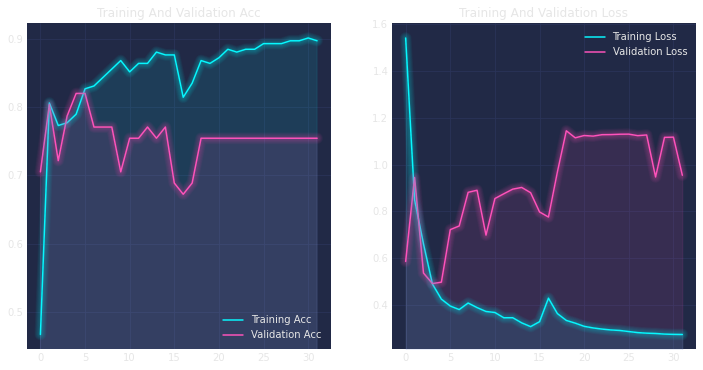

CPU times: user 4.3 s, sys: 697 ms, total: 4.99 s
Wall time: 4.46 s


In [6]:
%%time
classifier = tf.keras.Sequential()
tf.compat.v1.reset_default_graph()
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform' , activation = 'relu', input_dim = X_train.shape[1])) 
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

# Compiling the ANN 
classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

# Fitting the ANN to the Training set

r = classifier.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   callbacks=[callbacks.EarlyStopping(min_delta=0.0001,patience=40,restore_best_weights=True),
                             tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)],
                   batch_size=16,
                   epochs=32)

acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(12, 6))
plt.style.use('cyberpunk')
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend()
mplcyberpunk.add_glow_effects()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

In [7]:
y_pred_tr = [1 if each >= 0.5 else 0 for each in classifier.predict(X_train)]
y_pred_ts = [1 if each >= 0.5 else 0 for each in classifier.predict(X_test)]
# 
print('Train Accuracy score: {0:0.2f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.2f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.3f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

Train Accuracy score: 0.90
Train ROC AUC score: 0.90
Test Accuracy score: 0.75
Test ROC-AUC score: 0.746
[[18 10]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



### Step by step genetic algorithm with PyGAD

In [8]:
# Inputs

array_X = X_train#.values (Scaler function return np array and pygad working with np.array)
array_y = y_train.values

In [9]:
# Fitness function ``

def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

In [10]:
def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    if ga_instance.generations_completed % verbose == 0:
        print("Generation = {generation}".format(generation=ga_instance.generations_completed))
        print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
        print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy()

Generation = 100
Fitness    = 85.53719008264463
Change     = -0.8264462809917319
Generation = 200
Fitness    = 87.60330578512396
Change     = 0.41322314049587305
Generation = 300
Fitness    = 88.42975206611571
Change     = 0.0


/opt/conda/lib/python3.7/site-packages/pygad/nn/nn.py:156: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + numpy.exp(-1 * sop))


Generation = 400
Fitness    = 90.08264462809917
Change     = 0.0
Generation = 500
Fitness    = 90.9090909090909
Change     = 0.0
Generation = 600
Fitness    = 90.49586776859503
Change     = 0.41322314049585884
Generation = 700
Fitness    = 90.49586776859503
Change     = 0.0
Generation = 800
Fitness    = 90.49586776859503
Change     = 0.0
Generation = 900
Fitness    = 91.73553719008265
Change     = 0.0
Generation = 1000
Fitness    = 91.32231404958677
Change     = 0.0


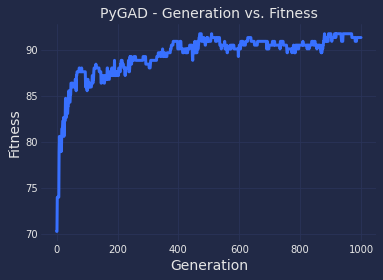

Fitness value of the best solution = 91.32231404958677
Index of the best solution : 1
Best fitness value reached after 470 generations.


In [11]:
data_inputs = array_X
data_outputs = array_y
num_inputs = data_inputs.shape[1]
num_classes = 2
num_solutions = 16
num_parents_mating = 4
num_generations = 1000
last_fitness = 0
mutation_percent_genes = 10 
parent_selection_type = "tournament"
K_tournament=4
keep_parents = -1
crossover_type = "uniform"
crossover_probability= 1 
mutation_percent_genes = 10 
mutation_type = "random"
verbose = 100

GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[8,16],
                                num_neurons_output=num_classes,
                                hidden_activations=["relu", "relu"],
                                output_activation="sigmoid")

population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)
initial_population = population_vectors.copy()

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       K_tournament=K_tournament,
                       parent_selection_type=parent_selection_type,
                       crossover_probability=crossover_probability,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()
ga_instance.plot_fitness()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

In [12]:
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs)

# Calculating some statistics
num_wrong = numpy.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))

Number of correct classifications : 221.
Number of wrong classifications : 21.
Classification accuracy : 91.32231404958677.


In [13]:
y_pred_tr = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_train)
y_pred_ts = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_test)


print('Train Accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.4f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

Train Accuracy score: 0.9132
Train ROC AUC score: 0.9121
Test Accuracy score: 0.8197
Test ROC-AUC score: 0.8171
[[22  6]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Keras Results:
* Train Accuracy score: 0.90
* Train ROC AUC score: 0.90
* Test Accuracy score: 0.75
* Test ROC-AUC score: 0.746

## PyGAD Results:
* Train Accuracy score: 0.9174
* Train ROC AUC score: 0.9159
* Test Accuracy score: 0.8361
* Test ROC-AUC score: 0.8295


* What can I do for better resullt?
* To do more optimise parameters :D
### My primary goal in this notebook, is we have a lot of algorithms for solutions, just know what you are searching for.

## Keep contact

![](https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_860,h_460/https://sciencemystic.com/wp-content/uploads/2021/09/Genetic-Algorithms.jpg)